In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Read the dataset into a pandas DataFrame
data = pd.read_csv('Data_Science_Salaries.csv')  

In [8]:
# Create an output directory to save all generated files and plots
output_dir = 'EDA_outputs'
os.makedirs(output_dir, exist_ok=True)

In [9]:
# Generate summary statistics for continuous variables
continuous_stats = data[['salary_in_usd', 'remote_ratio']].describe().T
continuous_stats['median'] = data[['salary_in_usd', 'remote_ratio']].median()

confidence_interval = 1.96 * (continuous_stats['std'] / np.sqrt(len(data)))
continuous_stats['95% CI'] = continuous_stats['mean'].round(2).astype(str) + " ± " + confidence_interval.round(2).astype(str)

continuous_stats['skew'] = data[['salary_in_usd', 'remote_ratio']].skew()
continuous_stats['kurtosis'] = data[['salary_in_usd', 'remote_ratio']].kurt()

continuous_stats = continuous_stats[['mean', 'median', 'std', '95% CI', 'skew', 'kurtosis']]
continuous_stats.columns = ['Mean', 'Median', 'Standard Deviation', '95% CI', 'Skewness', 'Kurtosis']
continuous_stats = continuous_stats.round(2)

#continuous_stats_path = os.path.join(output_dir, 'continuous_stats.csv')
#continuous_stats.to_csv(continuous_stats_path, index=True)
continuous_stats

,Mean,Median,Standard Deviation,95% CI,Skewness,Kurtosis
salary_in_usd,149874.72,141300.0,69009.18,149874.72 ± 1110.39,1.52,7.84
remote_ratio,32.76,0.0,46.49,32.76 ± 0.75,0.73,-1.44


In [10]:
# Summarize categorical variables
categorical_vars = ['experience_level', 'employment_type', 'job_title', 'company_size', 'company_location']
categorical_summary = {}

for var in categorical_vars:
    summary = data[var].value_counts().to_frame(name="Frequency")
    summary['Percentage (%)'] = (data[var].value_counts(normalize=True) * 100).round(2)
    categorical_summary[var] = summary

for var, summary_df in categorical_summary.items():
    file_path = os.path.join(output_dir, f"{var}_summary.csv")
    summary_df.to_csv(file_path, index=True)
    print(f"Table for {var} saved as: {file_path}")

categorical_summary_display = categorical_summary['experience_level']
categorical_summary_display

Table for experience_level saved as: EDA_outputs\experience_level_summary.csv
Table for employment_type saved as: EDA_outputs\employment_type_summary.csv
Table for job_title saved as: EDA_outputs\job_title_summary.csv
Table for company_size saved as: EDA_outputs\company_size_summary.csv
Table for company_location saved as: EDA_outputs\company_location_summary.csv


,Frequency,Percentage (%)
experience_level,,
SE,9696,65.35
MI,3553,23.95
EN,1148,7.74
EX,441,2.97


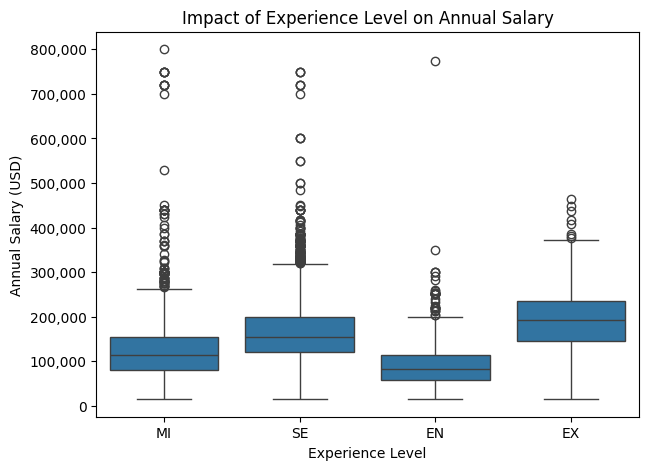

Plot saved as: EDA_outputs\boxplot_experience_level.png


In [11]:
# Boxplot for 'experience_level' vs. 'salary_in_usd'
plt.figure(figsize=(7, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Impact of Experience Level on Annual Salary')
plt.xlabel('Experience Level')
plt.ylabel('Annual Salary (USD)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  # Y-axis commas

boxplot_experience_path = os.path.join(output_dir, "boxplot_experience_level.png")
plt.savefig(boxplot_experience_path, bbox_inches='tight')

plt.show()

print(f"Plot saved as: {boxplot_experience_path}")

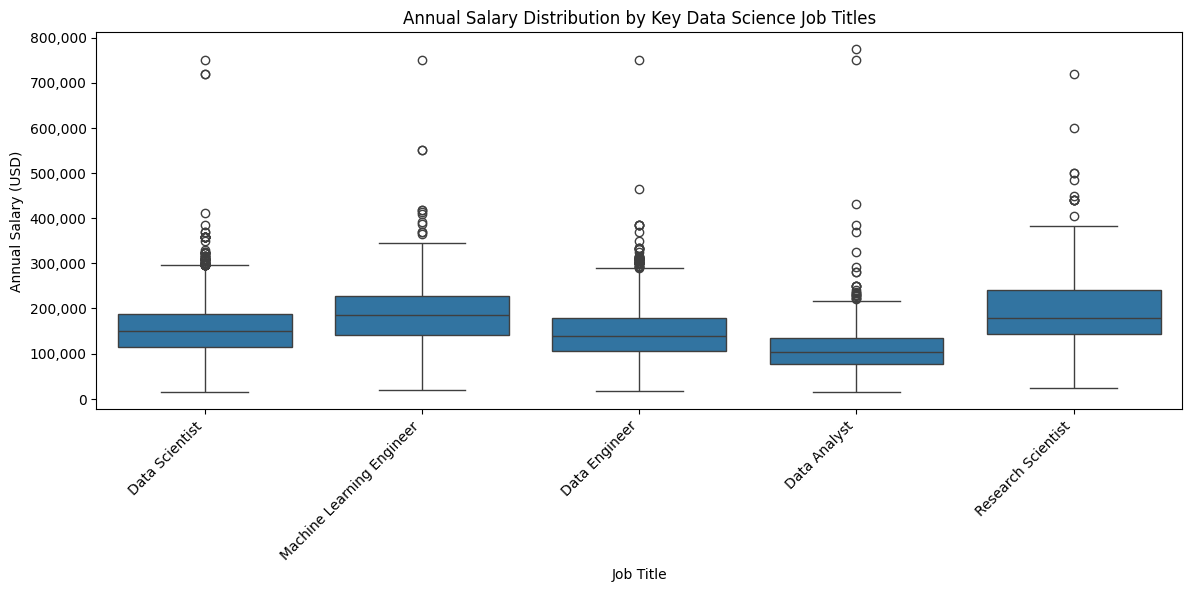

Plot saved as: EDA_outputs\boxplot_salary_jobtitle.png


In [12]:
# Boxplot for key job titles vs. salary
important_job_titles = ['Data Scientist', 'Machine Learning Engineer', 'Data Engineer', 'Data Analyst', 'Research Scientist']
filtered_data = data[data['job_title'].isin(important_job_titles)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_data, whis=1.5)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Annual Salary Distribution by Key Data Science Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Annual Salary (USD)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  
plt.tight_layout(pad=1)

boxplot_jobtitle_path = os.path.join(output_dir, 'boxplot_salary_jobtitle.png')
plt.savefig(boxplot_jobtitle_path, bbox_inches='tight')

plt.show()

print(f"Plot saved as: {boxplot_jobtitle_path}")

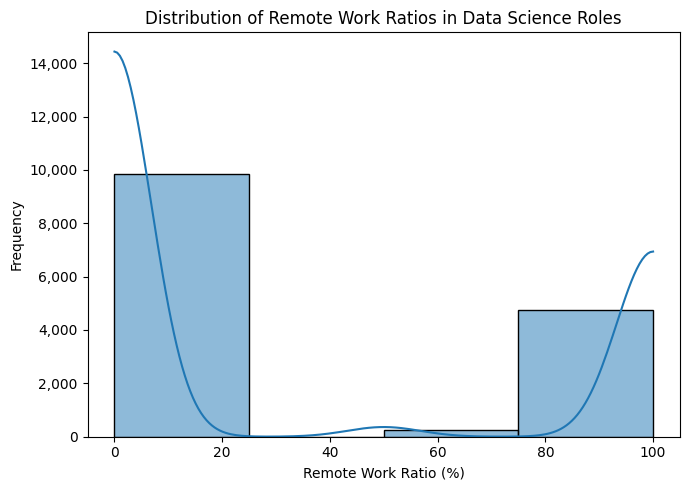

Plot saved as: EDA_outputs\histogram_remote_ratio.png


In [13]:
# Histogram for remote work ratios
plt.figure(figsize=(7, 5))
sns.histplot(data['remote_ratio'], bins=4, kde=True)
plt.title('Distribution of Remote Work Ratios in Data Science Roles')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  
plt.tight_layout()

hist_remote_ratio_path = os.path.join(output_dir, 'histogram_remote_ratio.png')
plt.savefig(hist_remote_ratio_path, bbox_inches='tight')

plt.show()

print(f"Plot saved as: {hist_remote_ratio_path}")

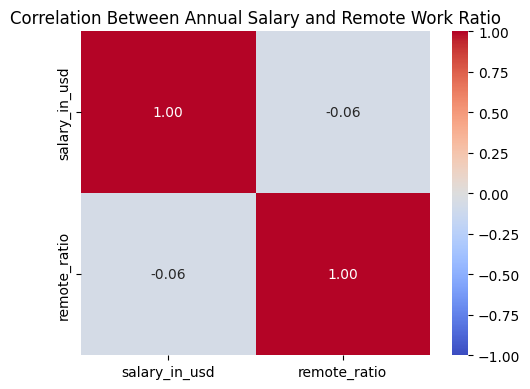

Plot saved as: EDA_outputs\correlation_continuous.png


In [14]:
# Heatmap for correlation between salary and remote ratio
plt.figure(figsize=(5, 4))
sns.heatmap(data[['salary_in_usd', 'remote_ratio']].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Annual Salary and Remote Work Ratio')
plt.tight_layout()

correlation_continuous_path = os.path.join(output_dir, 'correlation_continuous.png')
plt.savefig(correlation_continuous_path, bbox_inches='tight')

plt.show()

print(f"Plot saved as: {correlation_continuous_path}")

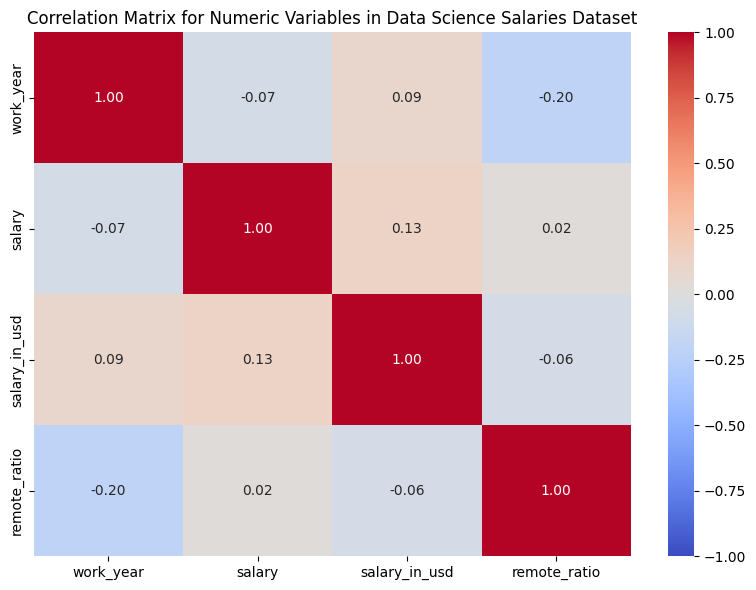

Plot saved as: EDA_outputs\correlation_full.png


In [15]:
# Heatmap for correlation matrix of numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numeric Variables in Data Science Salaries Dataset')
plt.tight_layout()

correlation_full_path = os.path.join(output_dir, 'correlation_full.png')
plt.savefig(correlation_full_path, bbox_inches='tight')

plt.show()

print(f"Plot saved as: {correlation_full_path}")